## Applying player tracking and homography

## Install dependencjes

In [ ]:
!pip install -q gdown inference-gpu
!pip install -q onnxruntime-gpu==1.18.0 --index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/

In [ ]:
!pip install -q git+https://github.com/roboflow/sports.git

In [ ]:
!pip uninstall -y supervision
!pip install -q git+https://github.com/roboflow/supervision.git

In [1]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

# Image In Question

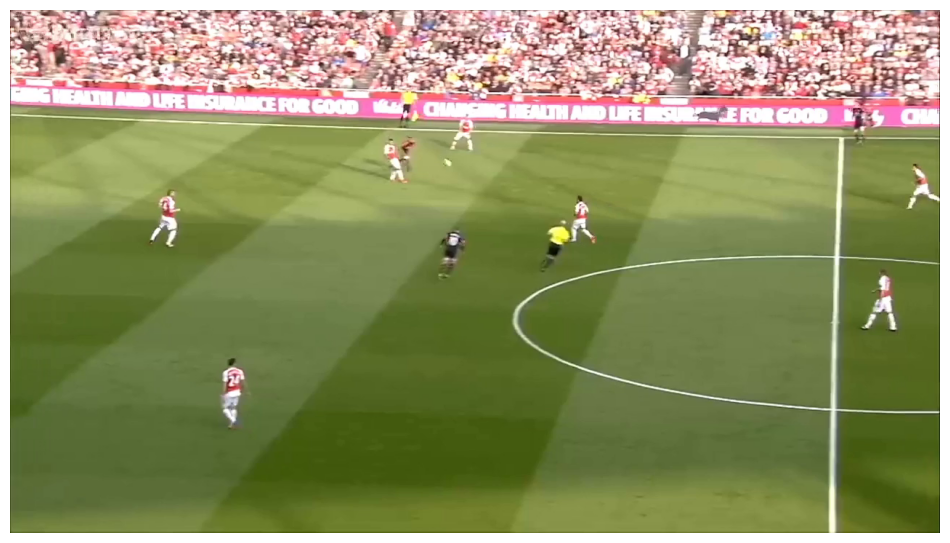

In [2]:
import supervision as sv

SOURCE_VIDEO_PATH = "data/ozil_goal_cut.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

## Testing Player Detection Model

In [3]:
# !pip install --upgrade inference
from inference import get_model

ROBOFLOW_API_KEY = 'g0kReC3ubPe9dTtlz7uN'
PLAYER_DETECTION_MODEL_ID = "arsenal-players/2"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


3
['bellerin', 'cazorla', 'coquelin', 'mustafi', 'ozil', 'ramsey', 'sanchez', 'walcott']


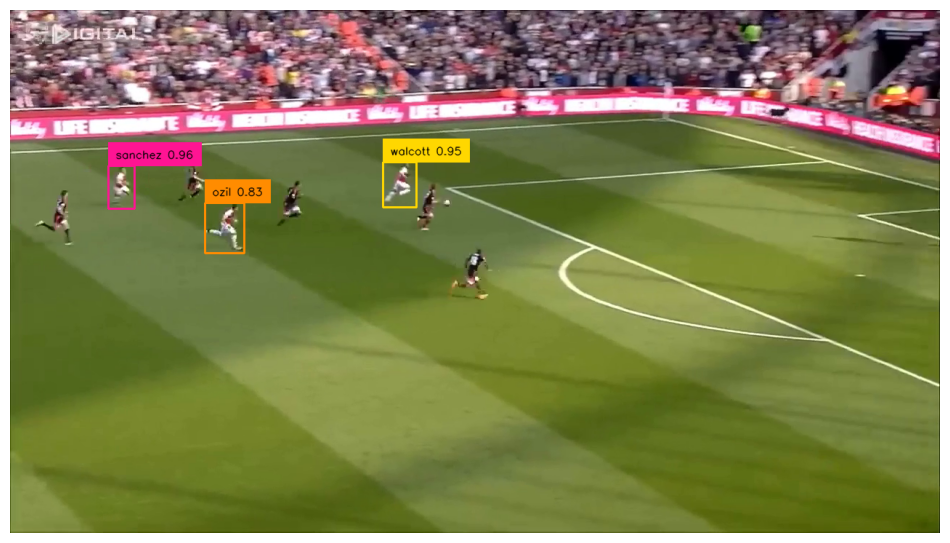

In [22]:
# import supervision as sv

# SOURCE_VIDEO_PATH = "/content/ozil_goal_cut.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)
print(detections)
print(PLAYER_DETECTION_MODEL.class_names)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

## Test Pitch Detection Model

In [5]:
from inference import get_model

FIELD_DETECTION_MODEL_ID = "pitch-detector-aq9zg/2"
FIELD_DETECTION_MODEL = get_model(model_id=FIELD_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

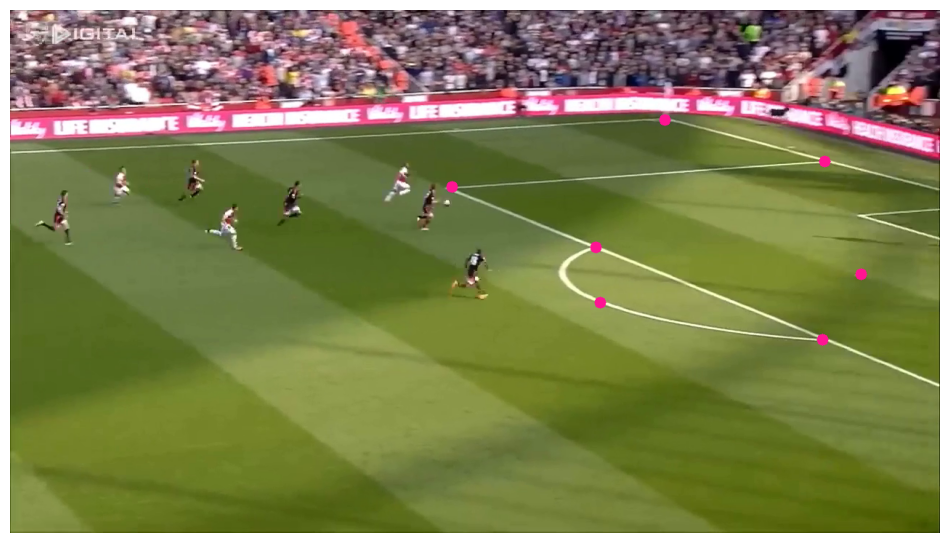

In [6]:
import numpy as np

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

sv.plot_image(annotated_frame)

## Test Ball Detections

In [7]:
BALL_DETECTION_MODEL_ID = "ball-detection-yqhcn/1"
BALL_DETECTION_MODEL = get_model(model_id=BALL_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

Detections(xyxy=array([[592., 202., 613., 223.]]), mask=None, confidence=array([0.8348161]), class_id=array([0]), tracker_id=None, data={'class_name': array(['ball'], dtype='<U4')})


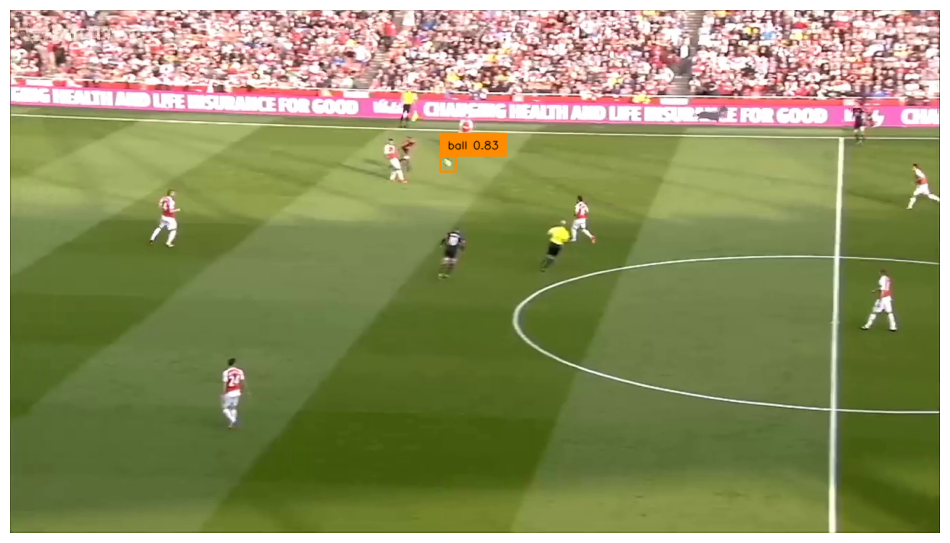

In [11]:
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = BALL_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)
print(detections)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

## All together

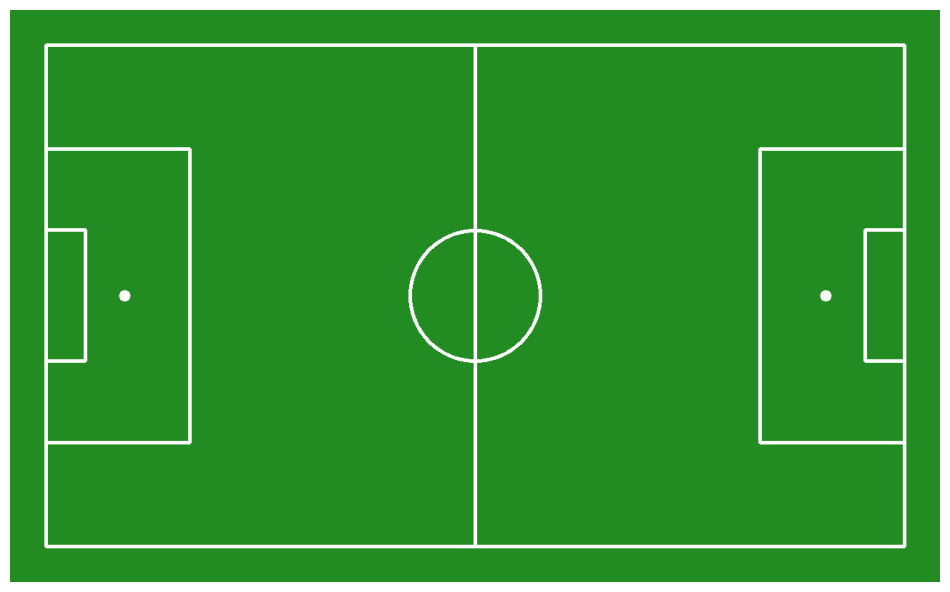

In [9]:
from sports.annotators.soccer import draw_pitch
from sports.configs.soccer import SoccerPitchConfiguration

CONFIG = SoccerPitchConfiguration()

annotated_frame = draw_pitch(CONFIG)

sv.plot_image(annotated_frame)

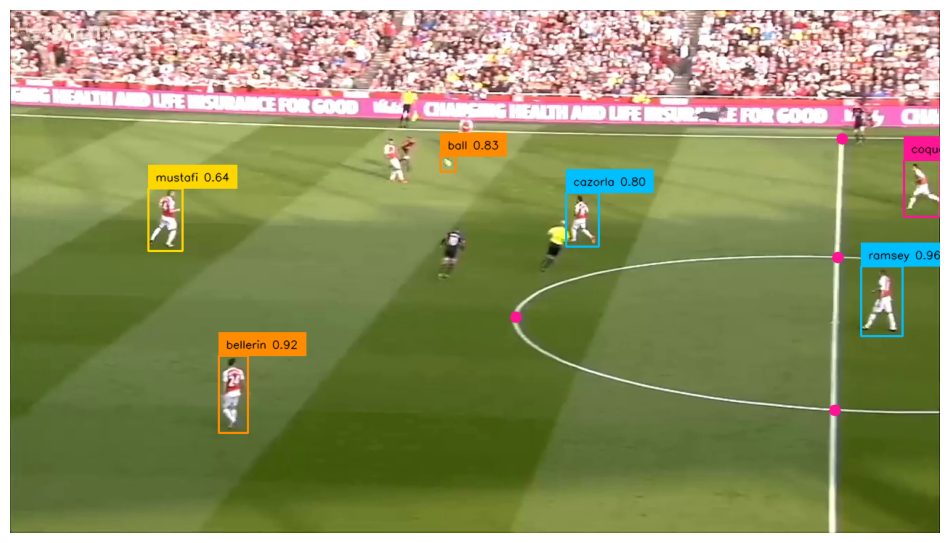

[ True]
KeyPoints(xy=array([[[1145.,  178.]],

       [[1139.,  341.]],

       [[1135.,  551.]],

       [[ 696.,  423.]]], dtype=float32), class_id=array([0, 0, 0, 0]), confidence=array([[0.99996305],
       [0.9999931 ],
       [0.99999344],
       [0.9999647 ]], dtype=float32), data={'class_name': array(['Key-Point', 'Key-Point', 'Key-Point', 'Key-Point'], dtype='<U9')})
[[    0.     0.]
 [    0.  1450.]
 [    0.  2584.]
 [    0.  4416.]
 [    0.  5550.]
 [    0.  7000.]
 [  550.  2584.]
 [  550.  4416.]
 [ 1100.  3500.]
 [ 2015.  1450.]
 [ 2015.  2584.]
 [ 2015.  4416.]
 [ 2015.  5550.]
 [ 6000.     0.]
 [ 6000.  2585.]
 [ 6000.  4415.]
 [ 6000.  7000.]
 [ 9985.  1450.]
 [ 9985.  2584.]
 [ 9985.  4416.]
 [ 9985.  5550.]
 [10900.  3500.]
 [11450.  2584.]
 [11450.  4416.]
 [12000.     0.]
 [12000.  1450.]
 [12000.  2584.]
 [12000.  4416.]
 [12000.  5550.]
 [12000.  7000.]
 [ 5085.  3500.]
 [ 6915.  3500.]]


ValueError: Source and target must have the same shape.

In [32]:
from sports.common.view import ViewTransformer
from sports.annotators.soccer import (
    draw_pitch,
    draw_points_on_pitch
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# class ids
BALL_ID = 0
RAMSEY_ID = 5
BELLERIN_ID = 0
COQ_ID = 2
CAZORLA_ID = 1
MUSTAFI_ID = 3
SANCHEZ_ID = 6
WALCOTT_ID = 7
OZIL_ID = 4
# player_ids = {
#     "RAMSEY_ID": 5,
#     "BELLERIN_ID": 0,
#     "COQ_ID": 2,
#     "CAZORLA_ID": 1,
#     "MUSTAFI_ID": 3,
#     "SANCHEZ_ID": 6,
#     "WALCOTT_ID": 7,
#     "OZIL_ID": 4
# }
player_detections = []


result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)
ramsey_detections = detections[detections.class_id == RAMSEY_ID]
bellerin_detections = detections[detections.class_id == BELLERIN_ID]
coq_detections = detections[detections.class_id == COQ_ID]
cazorla_detections = detections[detections.class_id == CAZORLA_ID]
mustafi_detections = detections[detections.class_id == MUSTAFI_ID]
sanchez_detections = detections[detections.class_id == SANCHEZ_ID]
walcott_detections = detections[detections.class_id == WALCOTT_ID]
ozil_detections = detections[detections.class_id == OZIL_ID]


# for i in player_ids:
#     player_detections.append(detections[detections.class_id == player_ids[i]])

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

result = BALL_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)
ball_detections = detections[detections.class_id == 0]

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

### PROJECT PLAYERS AND BALL ONTO 2D PLANE ####

filter = key_points.confidence[0] > 0.5
print(filter)
frame_reference_points = key_points.xy
print(key_points)
pitch_reference_points = np.array(CONFIG.vertices)
print(pitch_reference_points)

transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.BLACK,
    radius=10,
    pitch=annotated_frame)

# Ramsey
if ramsey_detections:
    ramsey_xy = ramsey_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_ramsey_xy = transformer.transform_points(points=ramsey_xy)
    # plot ramsey on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=ramsey_xy[ramsey_detections.class_id == 5],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

# Bellerin
if bellerin_detections:
    bellerin_xy = bellerin_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_bellerin_xy = transformer.transform_points(points=bellerin_xy)
    # plot bellerin on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=bellerin_xy[bellerin_detections.class_id == 0],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

# Coquelin
if coq_detections:
    coq_xy = coq_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_coq_xy = transformer.transform_points(points=coq_xy)
    # plot coquelin on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=coq_xy[coq_detections.class_id == 2],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

# Cazorla
if cazorla_detections:
    cazorla_xy = cazorla_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_cazorla_xy = transformer.transform_points(points=cazorla_xy)
    # plot cazorla on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=cazorla_xy[cazorla_detections.class_id == 1],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
    

# Mustafi
if mustafi_detections:
    mustafi_xy = mustafi_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_mustafi_xy = transformer.transform_points(points=mustafi_xy)
    # plot mustafi on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=mustafi_xy[mustafi_detections.class_id == 3],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

# Sanchez
if sanchez_detections:
    sanchez_xy = sanchez_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_sanchez_xy = transformer.transform_points(points=sanchez_xy)
    # plot sanchez on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=sanchez_xy[sanchez_detections.class_id == 6],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

# Walcott
if walcott_detections:
    walcott_xy = walcott_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_walcott_xy = transformer.transform_points(points=walcott_xy)
    # plot walcott on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=walcott_xy[walcott_detections.class_id == 7],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

# Ozil
if ozil_detections:
    ozil_xy = ozil_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_ozil_xy = transformer.transform_points(points=ozil_xy)
    # plot ozil on grid
    annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=ozil_xy[ozil_detections.class_id == 4],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

## Project players and ball onto 2D pitch



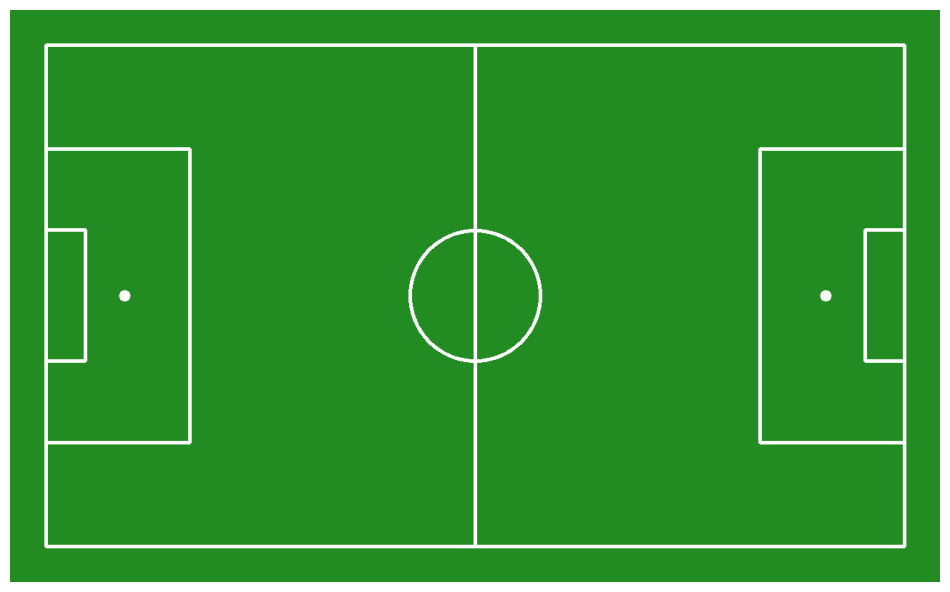

## project ball and arsenal players on pitch

Embedding extraction: 1it [00:00,  8.04it/s]


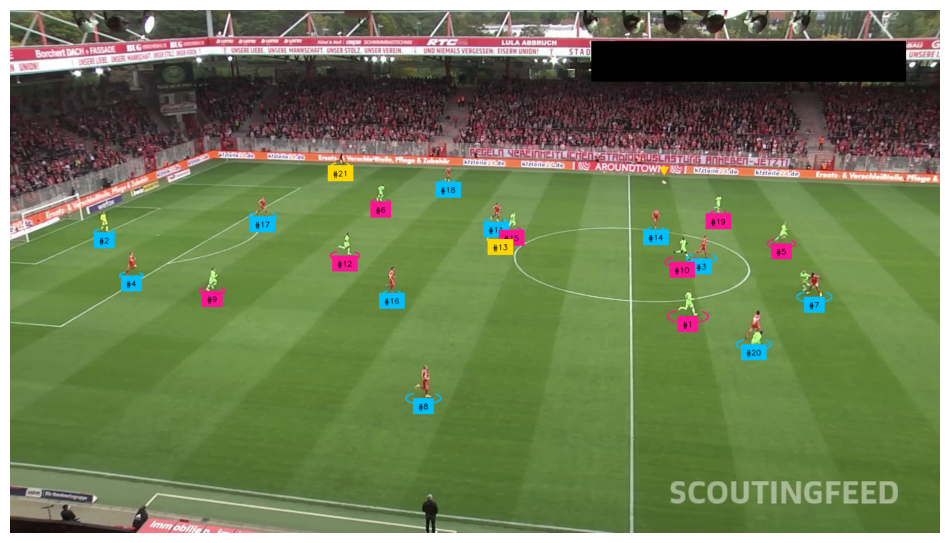

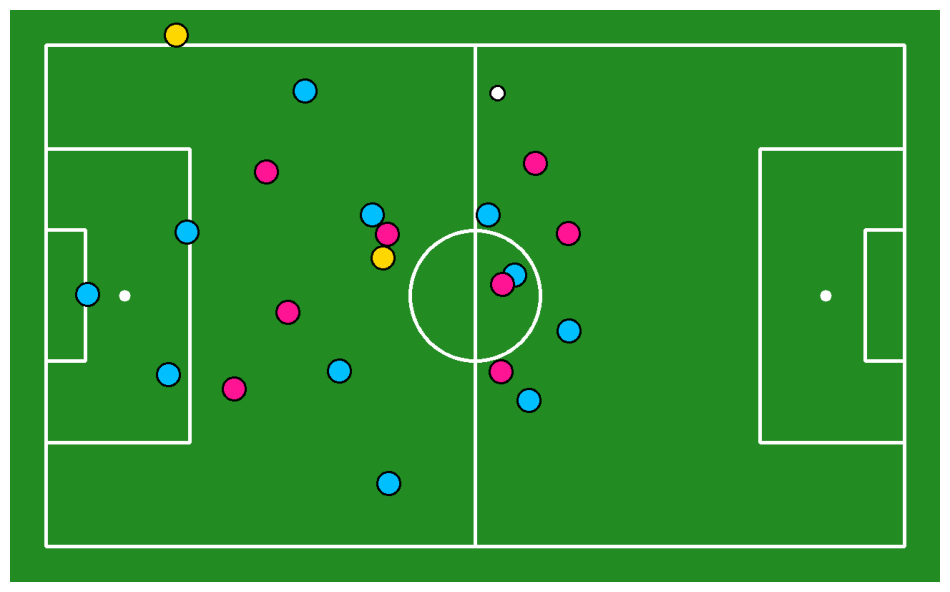

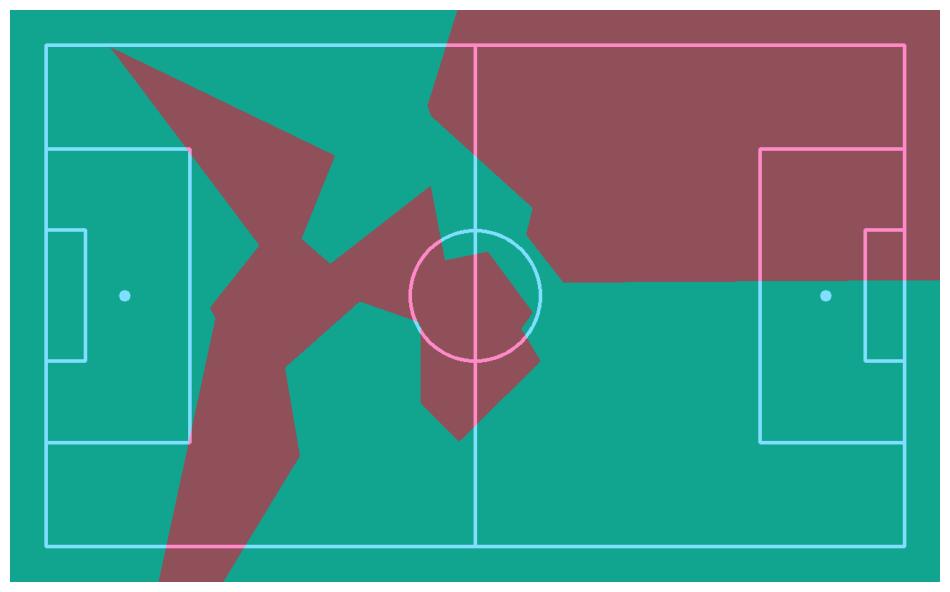

In [ ]:
# everything put together
import supervision as sv
from sports.annotators.soccer import (
    draw_pitch,
    draw_points_on_pitch,
    draw_pitch_voronoi_diagram
)

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# ball, goalkeeper, player, referee detection

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

# team assignment

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections)

referees_detections.class_id -= 1

all_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections, referees_detections])

# frame visualization

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

all_detections.class_id = all_detections.class_id.astype(int)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

players_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections
])

# detect pitch key points

result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

# project ball, players and referies on pitch

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
pitch_reference_points = np.array(CONFIG.vertices)[filter]

transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_players_xy = transformer.transform_points(points=players_xy)

referees_xy = referees_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_referees_xy = transformer.transform_points(points=referees_xy)

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.BLACK,
    radius=10,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 0],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 1],
    face_color=sv.Color.from_hex('FF1493'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_referees_xy,
    face_color=sv.Color.from_hex('FFD700'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_pitch_voronoi_diagram(
    config=CONFIG,
    team_1_xy=pitch_players_xy[players_detections.class_id == 0],
    team_2_xy=pitch_players_xy[players_detections.class_id == 1],
    team_1_color=sv.Color.from_hex('00BFFF'),
    team_2_color=sv.Color.from_hex('FF1493'),
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

## ball tracking

In [ ]:
from collections import deque
import supervision as sv
from sports.annotators.soccer import draw_pitch, draw_points_on_pitch

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
MAXLEN = 5

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

path_raw = []
M = deque(maxlen=MAXLEN)

for frame in tqdm(frame_generator, total=video_info.total_frames):

    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)

    ball_detections = detections[detections.class_id == BALL_ID]
    ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

    result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    key_points = sv.KeyPoints.from_inference(result)

    filter = key_points.confidence[0] > 0.5
    frame_reference_points = key_points.xy[0][filter]
    pitch_reference_points = np.array(CONFIG.vertices)[filter]

    transformer = ViewTransformer(
        source=frame_reference_points,
        target=pitch_reference_points
    )
    M.append(transformer.m)
    transformer.m = np.mean(np.array(M), axis=0)

    frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

    path_raw.append(pitch_ball_xy)

100%|██████████| 750/750 [01:35<00:00,  7.89it/s]


In [ ]:
path = [
    np.empty((0, 2), dtype=np.float32) if coorinates.shape[0] >= 2 else coorinates
    for coorinates
    in path_raw
]

path = [coorinates.flatten() for coorinates in path]

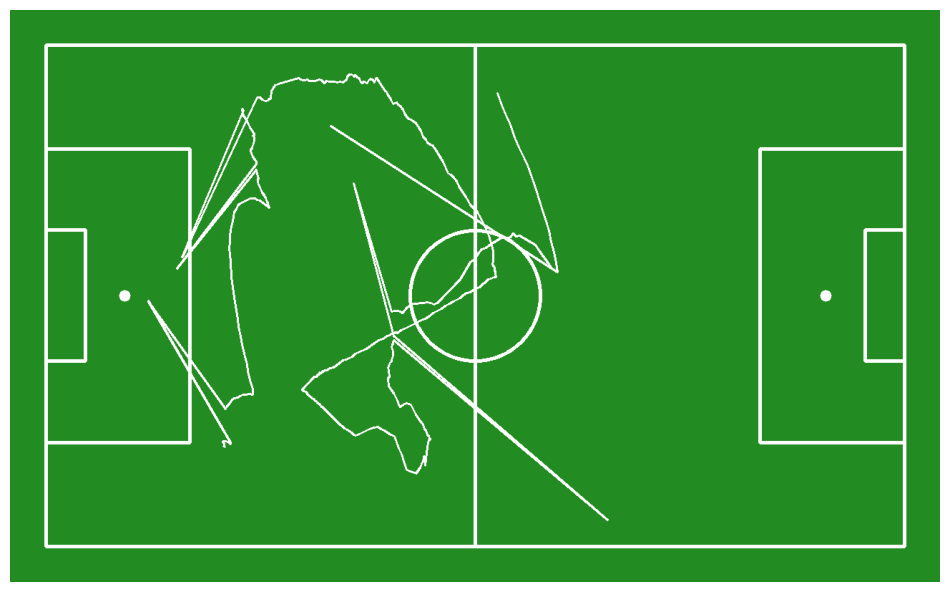

In [ ]:
from sports.annotators.soccer import draw_paths_on_pitch

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[path],
    color=sv.Color.WHITE,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

In [ ]:
from typing import List, Union

def replace_outliers_based_on_distance(
    positions: List[np.ndarray],
    distance_threshold: float
) -> List[np.ndarray]:
    last_valid_position: Union[np.ndarray, None] = None
    cleaned_positions: List[np.ndarray] = []

    for position in positions:
        if len(position) == 0:
            # If the current position is already empty, just add it to the cleaned positions
            cleaned_positions.append(position)
        else:
            if last_valid_position is None:
                # If there's no valid last position, accept the first valid one
                cleaned_positions.append(position)
                last_valid_position = position
            else:
                # Calculate the distance from the last valid position
                distance = np.linalg.norm(position - last_valid_position)
                if distance > distance_threshold:
                    # Replace with empty array if the distance exceeds the threshold
                    cleaned_positions.append(np.array([], dtype=np.float64))
                else:
                    cleaned_positions.append(position)
                    last_valid_position = position

    return cleaned_positions

In [ ]:
MAX_DISTANCE_THRESHOLD = 500

path = replace_outliers_based_on_distance(path, MAX_DISTANCE_THRESHOLD)

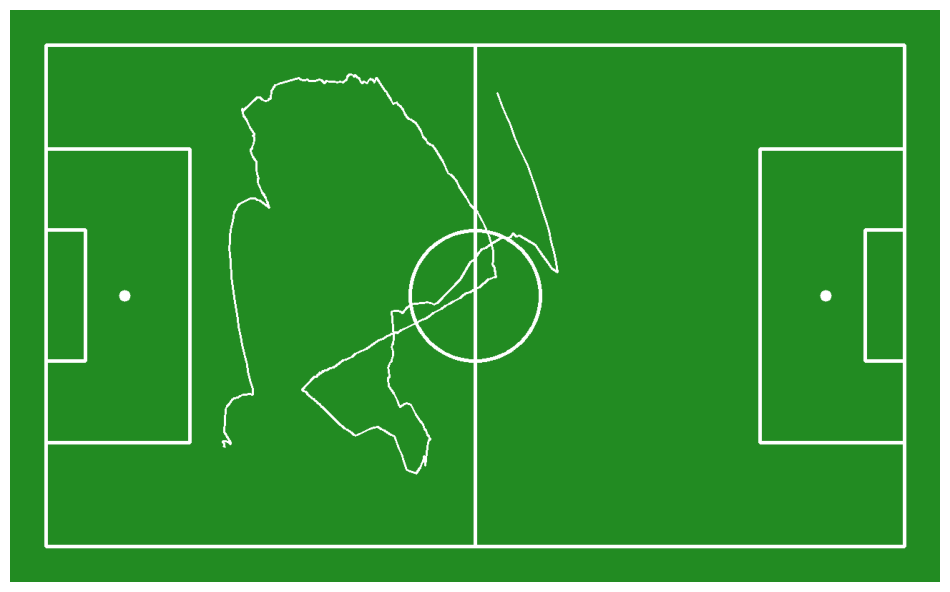

In [ ]:
from sports.annotators.soccer import draw_paths_on_pitch

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[path],
    color=sv.Color.WHITE,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

In [ ]:
def interpolate_empty_positions(path: List[np.ndarray]) -> List[np.ndarray]:
    # Find indices of empty arrays
    empty_indices = [i for i, arr in enumerate(path) if arr.size == 0]

    for idx in empty_indices:
        # Find the previous non-empty array
        prev_idx = max(i for i in range(idx) if path[i].size > 0)

        # Find the next non-empty array (if it exists)
        next_indices = [i for i in range(idx + 1, len(path)) if path[i].size > 0]
        if not next_indices:
            # If no next non-empty array exists, skip interpolation
            continue

        next_idx = min(next_indices)

        # Linear interpolation between the previous and next non-empty arrays
        weight = (idx - prev_idx) / (next_idx - prev_idx)
        interpolated_value = (1 - weight) * path[prev_idx] + weight * path[next_idx]

        # Replace the empty array with the interpolated value
        path[idx] = interpolated_value

    return path

In [ ]:
path = interpolate_empty_positions(path)

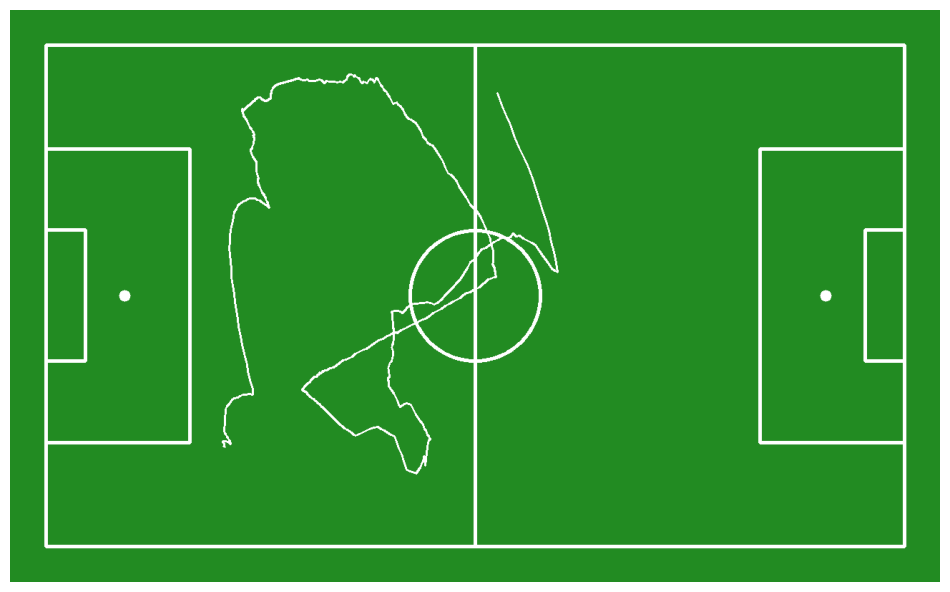

In [ ]:
from sports.annotators.soccer import draw_paths_on_pitch

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[path],
    color=sv.Color.WHITE,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)